In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from interpolation import Interpolator

In [2]:
RUB_Swaps = pd.read_csv('RUB swap points.csv')
RUB_Swaps=RUB_Swaps.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
USD_Rates = pd.read_csv('USD rates.csv')
USD_Rates.loc[0,'Conv, adj']=0.001295

In [3]:
#RUB_Swaps['Start_date']=['11/05/21','18/05/21','25/05/21','11/06/21','11/07/21','11/08/21','11/11/21','11/02/22'
#                         ,'11/05/22','11/05/23','11/05/24','11/05/25','11/05/26']
RUB_Swaps['Start_date'] = [0,7,14,30,60,90,180,270,360,720,1080,1440,1800]
RUB_Swaps

,Term,SW POINTS,Start_date
0,ON,131,0
1,1W,933,7
2,2W,2269,14
3,1M,4156,30
4,2M,8174,60
5,3M,12766,90
6,6M,25723,180
7,9M,39130,270
8,12M,52760,360
9,2Y,101653,720


In [4]:
USD_Rates

,USD Rate MKT Data,Unnamed: 1,"Conv, adj",StartDate,EndDate
0,Libor3m,0.001295,0.001295,10/28/21,1/28/22
1,EDZ1,99.810000,0.000140,12/15/21,3/15/22
2,EDH2,99.785000,0.000730,3/16/22,6/16/22
3,EDM2,99.680000,0.001650,6/15/22,9/15/22
4,EDU2,99.520000,0.002870,9/21/22,12/21/22
5,EDZ2,99.295000,0.004510,12/21/22,3/21/23
6,EDH3,99.110000,0.006360,3/15/23,6/15/23
7,EDM3,98.920000,0.008390,6/21/23,9/21/23
8,EDU3,98.690000,0.011040,9/20/23,12/20/23
9,EDZ3,98.585000,0.013800,12/20/23,3/20/24


In [5]:
Inter = Interpolator()
USD_Rates_Interpolated=[]
Swap_points_interpolated = []
t = 1
for T in USD_Rates['StartDate'][1:]:
    time_delta = (pd.Timestamp(T)-datetime.datetime(2021,11,15)).days
    Swap_points_interpolated.append(Inter.interpolate(list(RUB_Swaps['Start_date']),list(RUB_Swaps['SW POINTS']),time_delta))
    #USD_Rates_Interpolated.append(USD_Rates['Unnamed: 1'][t] - Swap_points_interpolated[-1]/10**4)
    t+=1

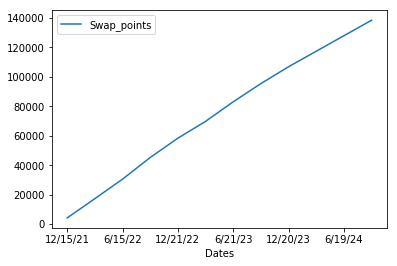

In [6]:
Swap_points_interpolated = pd.DataFrame({'Swap_points':Swap_points_interpolated,'Dates':USD_Rates['StartDate'][1:]})
Swap_points_interpolated.set_index('Dates',inplace=True)
Swap_points_interpolated.plot()

In [7]:
Swap_points_interpolated

,Swap_points
Dates,
12/15/21,4156.000000
3/16/22,17228.966667
6/15/22,30489.933333
9/21/22,45187.777778
12/21/22,58328.369444
3/15/23,69736.736111
6/21/23,83046.497222
9/20/23,95405.561111
12/20/23,106861.875000


In [8]:
Discount_factors= pd.DataFrame([1]*len(USD_Rates['StartDate'][1:]),index=USD_Rates['StartDate'][1:],columns=['Discount USD'])
Discount_factors

,Discount USD
StartDate,
12/15/21,1
3/16/22,1
6/15/22,1
9/21/22,1
12/21/22,1
3/15/23,1
6/21/23,1
9/20/23,1
12/20/23,1
